<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Good)</span></div>

## 1 Differential Equations and Euler

### 1.2 What do we mean by changes?

A system can change in **space, time, concentration**; almost any parameter that is available!

### 1.3 Calculus: Meaning and Notation

Simple model for the change of a population N across time t with rate of growth r
$$\frac{dN(t)}{dt}=rN(t)$$


### 1.4 Calculus: Getting a feel for $\dfrac{dN}{dt}$

$\frac{dN}{dt}\approx \frac{\Delta N}{\Delta t} \Rightarrow \Delta N = rN \Delta t$

At $t = a\Delta t$, given $N_0$,\
$N_a = N_{a-1} + \Delta N$\
$\Delta N = rN_a \times \Delta t$

An improved model with carrying capacity K:
$$\frac{dN}{dt}=rN\left(1-\frac{N}{K}\right)$$

### 1.5 Solving Differential Equations

A solution to a differential equation can either be **analytical** (i.e. like 
$y(t)=3t^3+5t)$ or **numerical** (i.e. a list of $(t,y)$ numbers). The **Euler method** is one of the simplest and most intuitive ways to solve a differential equation numerically.

### 1.6 The Euler Method

$$\frac{dy}{dt} = f(y,t)$$ can be approximated by:
$$\Delta y = f(y,t)\Delta t$$
For Step n+1:\
$y_{n+1} = y_n + f(y_n,t_n)\Delta t$\
$t_{n+1} = t_n + \Delta t$

### 1.7 Using Euler for the logistic equation

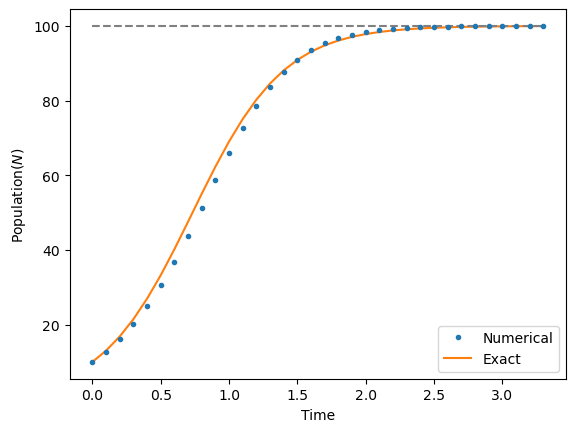

In [3]:
import numpy
import matplotlib.pyplot as plt
def logistic(time, N0, carrying_capacity, rate):
    '''
    This outputs the exact solution to 
    the logistic differential equation.
    '''
    C = 1/N0-1/carrying_capacity
    output = (1+C*carrying_capacity*np.exp(-rate*time))
    output = carrying_capacity/output
    return output


N_stop_difference = 1E-2                # Stop running if the change in population
                                        # between consecutive runs is less than this value
dt = .1
N0, K, rate = 10, 100, 3
data = {'time': [], 'N': []}
time, N = 0, N0

while True:
    data['time'].append(time)
    data['N'].append(N)

    dN = rate*N*(1-N/K)*dt
    N += dN
    time += dt

    # Should we stop the loop?
    try:
        # The lists start empty so the following will raise an
        # error the first two rounds. I am using try to get around it.
        if np.abs(data['N'][-1]-data['N'][-2]) <= N_stop_difference:
            break
    except IndexError:
        # I am being paranoid and checking if there is an error even
        # when the list has more than two elements
        if len(data['N']) < 2:
            pass
        else:
            print('Trouble')
            quit()

exact_data = logistic(time=np.array(data['time']),
                      N0=N0,
                      carrying_capacity=K,
                      rate=rate)

plt.plot(data['time'], data['N'], '.', label='Numerical')
plt.plot(data['time'], exact_data,
         label='Exact', zorder=1)  # zorder pushes the plot back
plt.legend(loc='lower right')
plt.ylabel('Population($N$)')
plt.xlabel('Time')
plt.hlines(K, 0, data['time'][-1],
           colors='grey', ls='dashed', zorder=1)

### 1.8 Some things to note about the code

1. I have used a dictionary to hold the time and population data. Isn’t it more elegant?
    - *A dictionary can be used to store paired/grouped lists/arrays.*
2. I use a True condition with the while loop. So, it will run until the end of The Universe until I break out on my own.
3. To break out, I check if the population has changed significantly?
    - The threshold I am using is $0.01$. To check this, I do not compare the two numbers (Never ever compare two floats!). Instead, I check if the difference between the two is as small as I want.
    - I use ``np.abs()`` to not worry if the difference is negative.
4. Since I need to compare two numbers, I will have to wait for at least two rounds for the condition to work. I use try-except to step around the hissy-fit that Python would otherwise throw.
    - I know what error (``IndexError``) to use because when I didn’t, Python screamed it at me!

## 2 Coupled Differential Equations: Predator-Prey Model

### 2.1 The equations

$$\frac{dr}{dt}=\alpha r - \beta rf$$
$$\frac{df}{dt}=\delta fr - \gamma f$$

### 2.2 Example code

Text(0.5, 1.0, 'Foxes vs Rabbits')

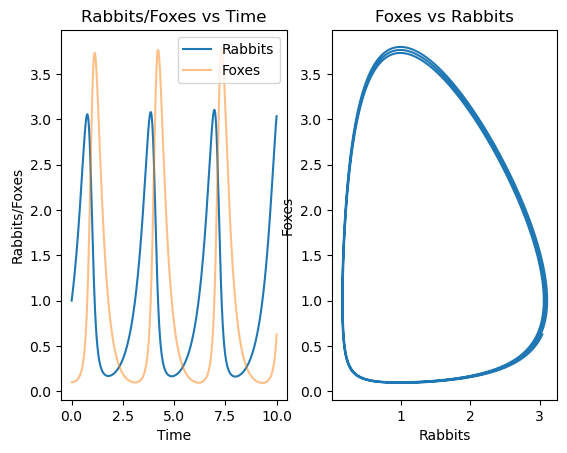

In [4]:
max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1
time, rabbits, foxes = 0, rabbits0, foxes0
data = []


# Lotka-Volterra equations
def drabbits_dt(rabbits, foxes):
    a, b = 2, 2
    return a*rabbits - b*rabbits*foxes


def dfoxes_dt(rabbits, foxes):
    d, g = 3, 3
    return d*foxes*rabbits - g*foxes


while True:
    data.append([time, rabbits, foxes])

    # Don't update the original variables because we need
    # the OLD values of rabbits to calculate foxes
    rabbits_new = rabbits + drabbits_dt(rabbits, foxes)*dt

    # Using the old value of rabbits
    foxes += dfoxes_dt(rabbits, foxes)*dt

    # No more need for two variables
    rabbits = rabbits_new

    time += dt

    if time > max_time:
        break

# Reorganising the data so I can easily access
# them without having to mess with indices
data = np.array(data)
data = {
    'time': data[:, 0],
    'rabbits': data[:, 1],
    'foxes': data[:, 2],
}

fig, ax = plt.subplots(nrows=1, ncols=2)
ax_with_time, ax_with_other = ax

# Plotting the individual species
ax_with_time.plot(data['time'], data['rabbits'], label='Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label='Foxes', alpha=.5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()

# Plotting one against the other
ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')

### 2.3 Some things to note about the code

1. Notice how I encapsulated the derivatives in functions. This way of doing things allowed me to worry about what was happening in the loop without any distractions.

2. I had to use a new variable ``rabbit_new`` to hold the new value of rabbits temporarily. This is because I still need the old value (contained in ``rabbits``) to calculate the new value for ``foxes``. This is a tad subtle; make sure you are comfortable with it!

3. This time, I first used a list ``data`` to collect the data and split them into a dictionary later. Some might consider this unnecessary. But it makes the code more readable

## 3 Hello SciPy

### 3.1 SciPy odeint()

In [5]:
from scipy.integrate import odeint

### 3.2 Radioactivity

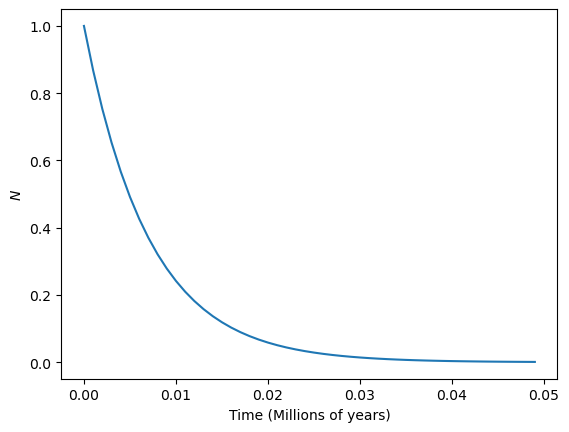

In [12]:
max_time = 0.05
dt = .001
decay_constant = 142       # For 85 Rb (per Myr)
N0 = 1                     # Starting value of N (in billions of atoms)


def dNdt(N, time, decay_constant):
    '''
    Function for the derivative.
    '''
    return - decay_constant*N


all_time = np.arange(0, max_time, dt)

all_N = odeint(y0=[N0],                  # Initial values
               func=dNdt,                # Function for the drivative
               t=all_time,               # Time span
               args=(decay_constant,)    # Any arguments to dNdt
               )
plt.ylabel('$N$')
plt.xlabel('Time (Millions of years)')
plt.plot(all_time,all_N)

### 3.3 Logistic Equation

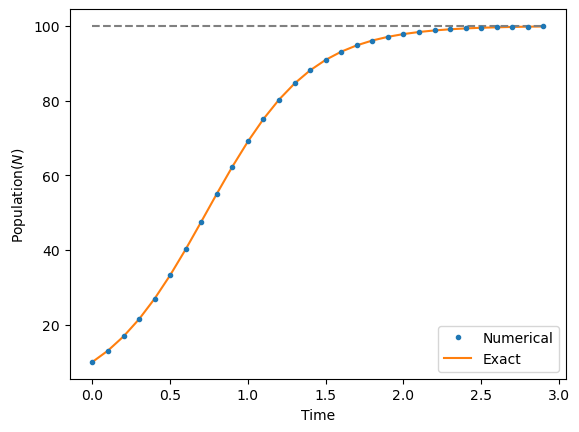

In [14]:
def dNdt(N, time, rate, carrying_capacity):
    '''
    Function for the derivative.
    '''
    return rate*N*(1-N/carrying_capacity)


max_time, dt = 3, .1
N0, K, rate = 10, 100, 3


exact_data = logistic(time=np.array(data['time']),
                      N0=N0,
                      carrying_capacity=K,
                      rate=rate)

data = {}
data['time'] = np.arange(0, max_time, dt)
data['N'] = odeint(dNdt, N0, data['time'], (rate, K))

plt.plot(data['time'], data['N'], '.', label='Numerical')
plt.plot(data['time'], exact_data,
         label='Exact', zorder=1)  # zorder pushes the plot back
plt.legend(loc='lower right')
plt.ylabel('Population($N$)')
plt.xlabel('Time')
plt.hlines(K, 0, data['time'][-1],
           colors='grey', ls='dashed', zorder=1)

### 3.4 Predator-Prey

Text(0.5, 1.0, 'Foxes vs Rabbits')

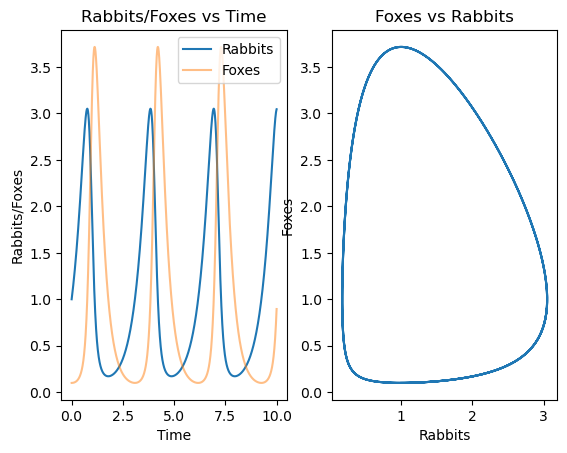

In [9]:
max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1

# Lotka-Volterra equations
def dy_dt(y, t):
    '''
    Function for the derivative.
    - y contains all the variables for the simulation 
    - t is the dependant variable
    '''

    rabbits, foxes = y

    # Rabbits
    a, b = 2, 2
    drabbits_dt = a*rabbits - b*rabbits*foxes

    # Foxes
    d, g = 3, 3
    dfoxes_dt = d*foxes*rabbits - g*foxes

    return [drabbits_dt, dfoxes_dt]


data = {}
data['time'] = np.arange(0, max_time, dt)

# Note the order I pass the rabbit and fox information
results = odeint(y0=[rabbits0, foxes0],          # Dependant variable
                 func=dy_dt,                     # Derivatives
                 t=data['time']                  # Independant variable
                 )
# Extract the individual results (Note, the order matters)
data['rabbits'] = results[:, 0]
data['foxes'] = results[:, 1]


fig, ax = plt.subplots(nrows=1, ncols=2)
ax_with_time, ax_with_other = ax

# Plotting the individual species
ax_with_time.plot(data['time'], data['rabbits'], label='Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label='Foxes', alpha=.5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()

# Plotting one against the other
ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')

## Exercise 1 :  The Lorentz Attaractor

In [37]:
sig = 10
bet = 8/3
rho = 28
def dx_dt(x,y,z):
    return sig*(y-x)
def dy_dt(x,y,z):
    return x*(rho-z)-y
def dz_dt(x,y,z):
    return x*y-bet*z
tstep = 0.001
t = 0
x,y,z = [0],[1],[0]
x1,y1,z1 = 0,1,0

while t<51:
    xn = x1+ dx_dt(x1,y1,z1)*tstep
    yn = y1+ dy_dt(x1,y1,z1)*tstep
    zn = z1+ dz_dt(x1,y1,z1)*tstep
    x.append(xn)
    y.append(yn)
    z.append(zn)
    x1,y1,z1 = xn,yn,zn
    t += tstep
    

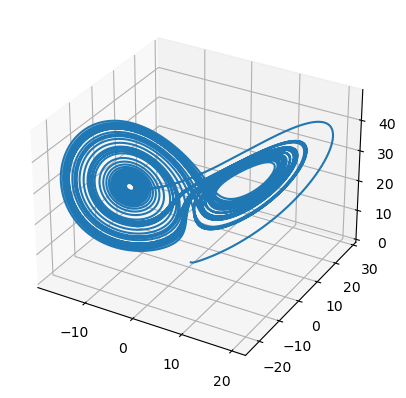

In [38]:
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z)
plt.show()